# Listing 2.1 Loading the MNIST dataset in Keras

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [3]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [4]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Class Label: 5


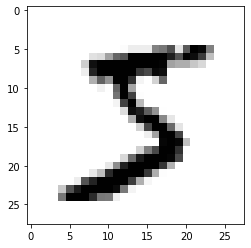

In [6]:
import matplotlib.pyplot as plt

digit = train_images[0]
print("Class Label:",train_labels[0])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 6


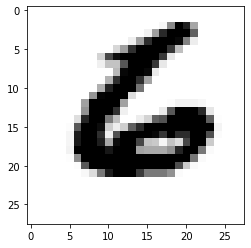

In [10]:
index = 9999
digit = test_images[index]
print("Class Label:",test_labels[index])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[7 2 1 ... 4 5 6]
[0 1 2 3 4 5 6 7 8 9]


# Listing 2.2 The network architecture

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()


network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

# Listing 2.3 The compilation step

In [15]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [17]:
print(train_images.shape)
train_images.ndim

(60000, 28, 28)


3

In [20]:
0/255

0.0

# Listing 2.4 Preparing the image data

In [21]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

In [22]:
print(train_images.shape)
train_images.ndim

(60000, 784)


2

# Listing 2.5 Preparing the labels

In [25]:
train_labels[0]

5

In [ ]:
#5  0  0 0 0 0 1 0 0 0 0

#   0 1 2 3 4 5 6 7 8 9 
#0
#1
#2
#3
#4
#5
#6
#7
#8
#9

# One-Hot-Encoding

In [26]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Now Train your Model

In [29]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2610 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1074 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0704 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0386 - accuracy: 0.9885


In [32]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9782
test_acc: 0.9782000184059143


In [33]:
test_loss

0.0713062658905983